In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [2]:
footfall=pd.read_csv(r"C:\Users\aksha\Downloads\footfalls.csv")

<Axes: >

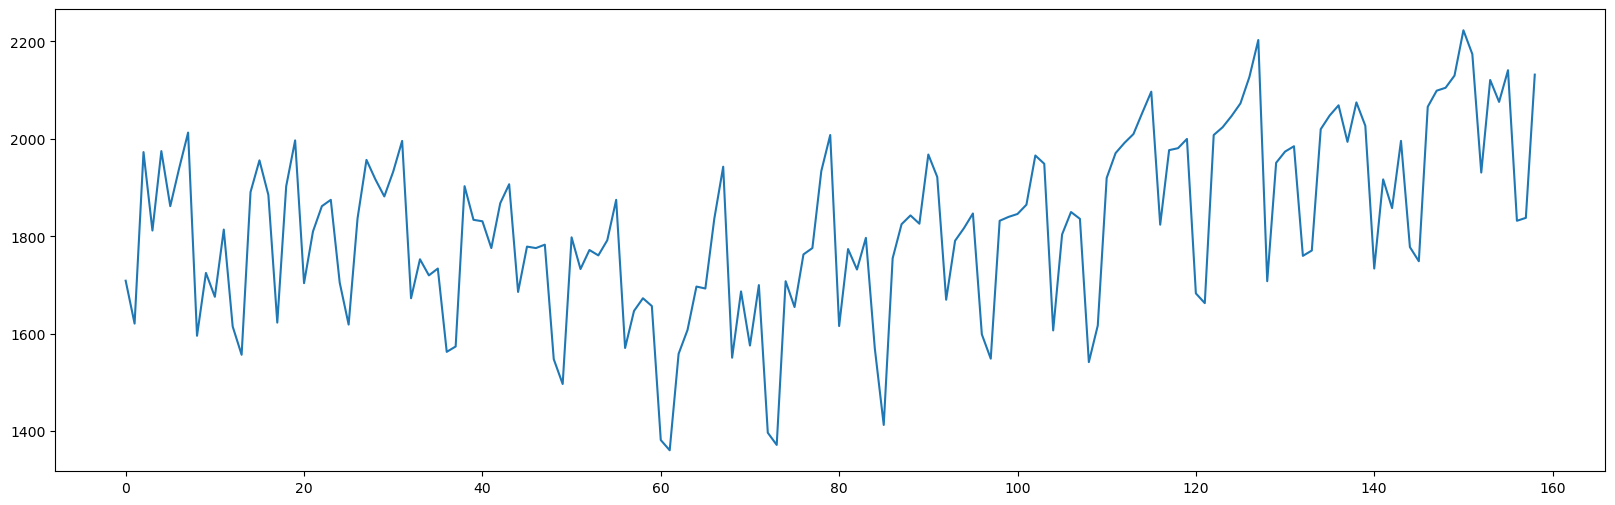

In [3]:
plt.figure(figsize=(20,6))
footfall['Footfalls'].plot()

In [4]:
train=footfall.head(147)
test=footfall.tail(12)

### Moving Average

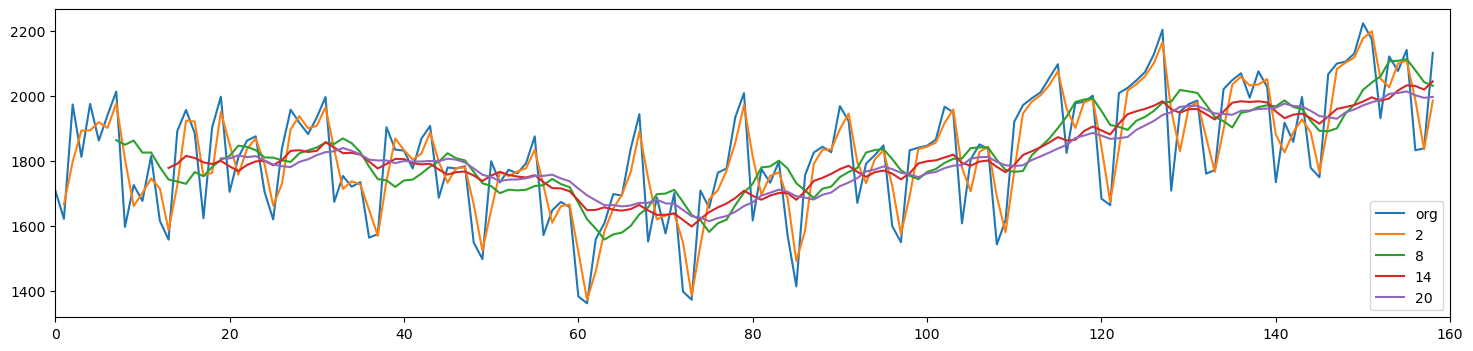

In [8]:
plt.figure(figsize=(18,4))
footfall['Footfalls'].plot(label="org")
for i in range(2,24,6):
    footfall['Footfalls'].rolling(i).mean().plot(label=str(i))
plt.xlim(0,160)
plt.legend() 

In [9]:
# the moving average is used to remove the seasonality and trend in our data

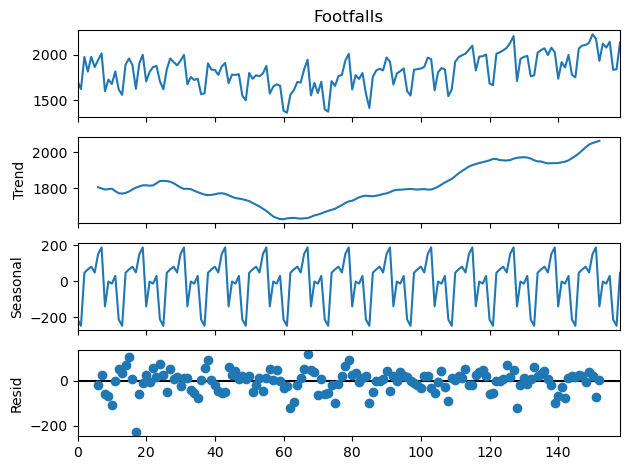

In [11]:
decomp=seasonal_decompose(footfall['Footfalls'],period=12)
decomp.plot()
plt.show()

In [18]:
# MAPE
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [26]:
# simple exp

ses_model=SimpleExpSmoothing(train['Footfalls']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Footfalls)

C:\Users\aksha\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


8.490637057828376

In [27]:
# Holts methode

h_model=Holt(train['Footfalls']).fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_h=h_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_h,test.Footfalls)

C:\Users\aksha\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


7.546249229496056

In [28]:
# holts-winter with trend = add and seasonality = add

hwaa_model=ExponentialSmoothing(train['Footfalls'],trend='add',seasonal='add',seasonal_periods=12).fit()
pred_hwaa=hwaa_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwaa,test.Footfalls)


3.0002515339033207

In [29]:
# holts-winter with trend = add and seasonality = mul

hwam_model=ExponentialSmoothing(train['Footfalls'],trend='add',seasonal='mul',seasonal_periods=12).fit()
pred_hwam=hwam_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwam,test.Footfalls)


2.869006920614637

In [30]:
# holts-winter with trend = mul and seasonality = mul

hwmm_model=ExponentialSmoothing(train['Footfalls'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
pred_hwmm=hwmm_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwmm,test.Footfalls)


C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


2.8722166810739354

In [31]:
# holts-winter with trend = mul and seasonality = add

hwma_model=ExponentialSmoothing(train['Footfalls'],trend='mul',seasonal='add',seasonal_periods=12).fit()
pred_hwma=hwma_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwma,test.Footfalls)


C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


3.3435972125832056

In [32]:
# the best model is holts-winter with trend = add and seasonality = mul

In [33]:
final_model=ExponentialSmoothing(footfall['Footfalls'],trend='add',seasonal='mul',seasonal_periods=12).fit()